## 1번
데이터 설명
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.     
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.     
- Description: Product (item) name. Nominal.    
- Quantity: The quantities of each product (item) per transaction. Numeric.     
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.   
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.    
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.     
- Country: Country name. Nominal, the name of the country where each customer resides.     

### 1-1. 
결측치를 확인하고, 결측치 제거할 것

In [2]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany


### 1-2. 
이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것

이상치를 판단하는 방법  
+ IQR 방식을 이용한 이상치 탐지
    + IQR = Q3 - Q1 으로 하고 Q3 + 1.5*IQR, Q1 - 1.5*IQR 바깥 범위 값을 이상치로 간주

이상치가 전체 데이터에서 매우 적은 부분을 가지고 있으면 이상치를 대체하지 않고 제거하기도 한다.

Qunatity 와 UnitPrice 의 이상치를 탐지하고 제거하자.

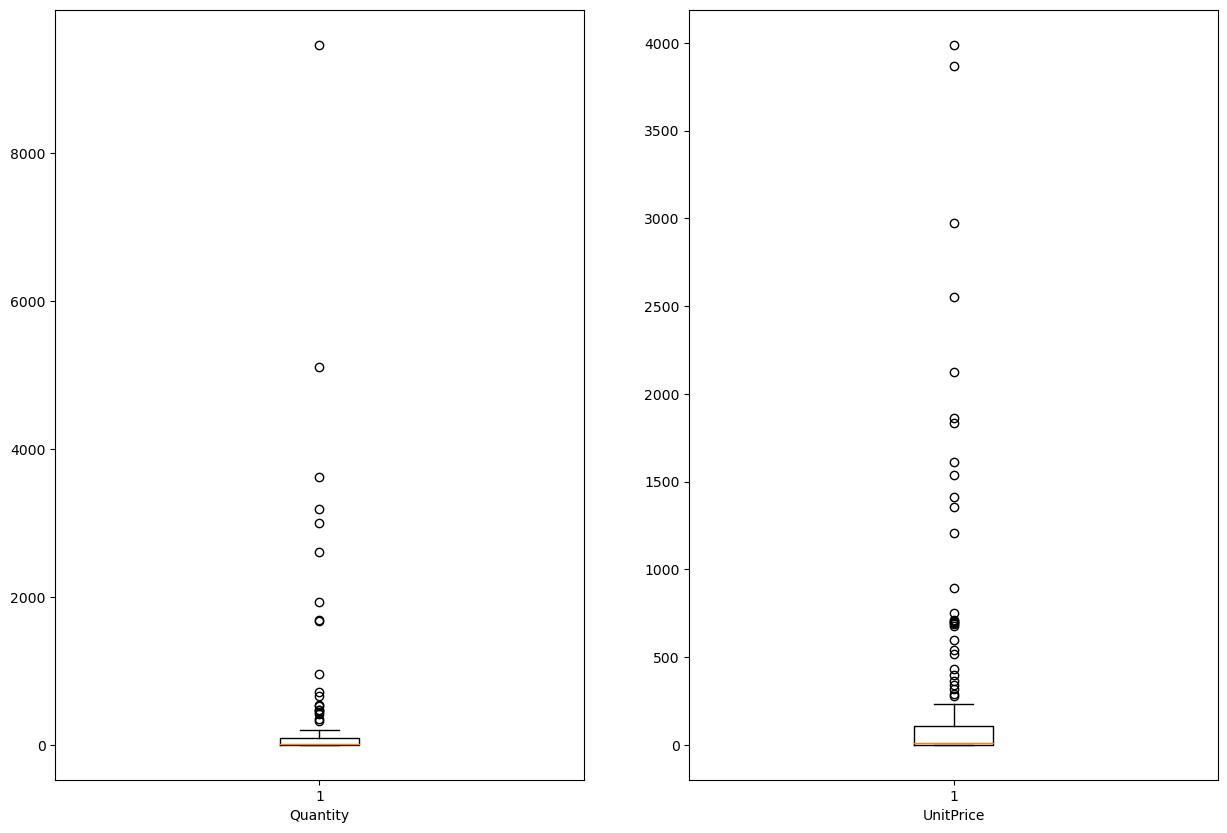

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize = (15, 10))
ax[0].boxplot(df['Quantity'].value_counts())
ax[0].set_xlabel('Quantity')
ax[1].boxplot(df['UnitPrice'].value_counts())
ax[1].set_xlabel('UnitPrice')
plt.show()

이상치의 위치를 찾아보자.

In [4]:
# Quantity 변수의 이상치
q1 = df['Quantity'].quantile(0.25)
q3 = df['Quantity'].quantile(0.75)
IQR = df['Quantity'].quantile(0.75) - df['Quantity'].quantile(0.25)
outlier_quan = df[(df['Quantity'] > q3 + 1.5*IQR) | (df['Quantity'] < q1 - 1.5*IQR)]

print(outlier_quan.head())
print('Quantity 이상치 비율 {:.2f}%'.format((outlier_quan.shape[0] / df.shape[0])*100))

   InvoiceNo StockCode                         Description  Quantity  \
2     578509     22492             MINI PAINT SET VINTAGE         36   
12    544479     22553              PLASTERS IN TIN SKULLS        96   
27    540280     21421               PORCELAIN ROSE LARGE         60   
29    552883     21096     SET/6 FRUIT SALAD  PAPER PLATES       192   
50    555531     84988  SET OF 72 PINK HEART PAPER DOILIES        72   

         InvoiceDate  UnitPrice  CustomerID      Country  
2   11/24/2011 13:17       0.65     12705.0      Germany  
12   2/21/2011 10:28       1.45     14646.0  Netherlands  
27    1/6/2011 12:37       1.25     12386.0    Australia  
29   5/12/2011 10:13       0.39     14646.0  Netherlands  
50    6/5/2011 11:53       1.45     12678.0       France  
Quantity 이상치 비율 11.26%


In [5]:
# UnitPrice 변수의 이상치
q1 = df['UnitPrice'].quantile(0.25)
q3 = df['UnitPrice'].quantile(0.75)
IQR = df['UnitPrice'].quantile(0.75) - df['UnitPrice'].quantile(0.25)
outlier_price = df[(df['UnitPrice'] > q3 + 1.5*IQR) | (df['UnitPrice'] < q1 - 1.5*IQR)]

print(outlier_price.head())
print('UnitPrice 이상치 비율 {:.2f}%'.format((outlier_price.shape[0] / df.shape[0])*100))

   InvoiceNo StockCode                        Description  Quantity  \
9     540547        C2                           CARRIAGE         1   
11    545034      POST                            POSTAGE         1   
13    548489    72760B  VINTAGE CREAM 3 BASKET CAKE STAND         4   
26    540365     20750           RED RETROSPOT MINI CASES         6   
37    572133     21217      RED RETROSPOT ROUND CAKE TINS         3   

         InvoiceDate  UnitPrice  CustomerID      Country  
9     1/9/2011 16:07      50.00     14911.0         EIRE  
11   2/25/2011 16:42      40.00     13493.0  Switzerland  
13   3/31/2011 13:10       9.95     12619.0      Germany  
26    1/6/2011 16:12       7.95     12413.0       France  
37  10/21/2011 10:11       9.95     12407.0      Belgium  
UnitPrice 이상치 비율 12.43%


In [6]:
index1 = set(outlier_price.index) 
index2 = set(outlier_quan.index)
index3 = list(index1.union(index2))

df_noout = df.loc[[x for x in df.index if x not in index3], :].reset_index(drop = True)
df_noout

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
3,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany
4,570672,21591,COSY HOUR CIGAR BOX MATCHES,24,10/11/2011 14:52,1.25,12536.0,France
...,...,...,...,...,...,...,...,...
31338,565851,22320,BIRDS MOBILE VINTAGE DESIGN,6,9/7/2011 13:06,5.95,14911.0,EIRE
31339,560590,21884,CAKES AND BOWS GIFT TAPE,12,7/19/2011 15:55,0.65,12560.0,Germany
31340,561870,21156,RETROSPOT CHILDRENS APRON,8,7/31/2011 11:45,1.95,14911.0,EIRE
31341,579792,22436,12 COLOURED PARTY BALLOONS,20,11/30/2011 15:43,0.65,12714.0,France


In [33]:
print('original :', df.shape)
print('Drop outlier :', df_noout.shape)

original : (41024, 8)
Drop outlier : (31343, 8)


### 1-3 
전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것


K-means의 장점
+ 일반적인 군집화에서 가장 많이 활용되는 알고리즘이다.
+ 알고리즘이 쉽고 간결하다.

K-means의 단점
+ 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어진다.
+ 이를 위해 PCA로 차원을 축소하고 적용해야할 필요가 있을 수도 있다.
+ 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 느려진다.
+ 몇 개의 군집을 선택해야 할지가 하이퍼파라미터로 정해져 있어 가이드하기 어렵다.

In [9]:
df_noout

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
3,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany
4,570672,21591,COSY HOUR CIGAR BOX MATCHES,24,10/11/2011 14:52,1.25,12536.0,France
...,...,...,...,...,...,...,...,...
31338,565851,22320,BIRDS MOBILE VINTAGE DESIGN,6,9/7/2011 13:06,5.95,14911.0,EIRE
31339,560590,21884,CAKES AND BOWS GIFT TAPE,12,7/19/2011 15:55,0.65,12560.0,Germany
31340,561870,21156,RETROSPOT CHILDRENS APRON,8,7/31/2011 11:45,1.95,14911.0,EIRE
31341,579792,22436,12 COLOURED PARTY BALLOONS,20,11/30/2011 15:43,0.65,12714.0,France


In [10]:
df_noout[['Quantity', 'UnitPrice', 'CustomerID']].groupby('CustomerID').mean()

,Quantity,UnitPrice
CustomerID,,
12348.0,23.333333,0.650000
12349.0,9.017241,2.607759
12350.0,12.250000,1.581250
12352.0,5.986301,3.054110
12354.0,11.522727,2.403864
...,...,...
14934.0,10.115942,2.388261
14936.0,12.516245,2.170794
14937.0,12.093750,3.000000


In [13]:
import warnings
warnings.filterwarnings(action='ignore')

In [17]:
# CustomerID 마다 Quantity와 Unitprice 의 평균을 가지고 군집분석을 수행하자.
df_user = df_noout[['Quantity', 'UnitPrice', 'CustomerID']].groupby('CustomerID').mean()

# 군집분석 전 표준화작업 수행하자.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_user_scaled = pd.DataFrame(scaler.fit_transform(df_user), columns = df_user.columns)
df_user_scaled

,Quantity,UnitPrice
0,3.176471,-2.437685
1,-0.473780,0.582695
2,0.350494,-1.000976
3,-1.246596,1.271314
4,0.165057,0.268131
...,...,...
337,-0.193639,0.244060
338,0.418380,-0.091442
339,0.310654,1.187836
340,-0.478177,1.668469


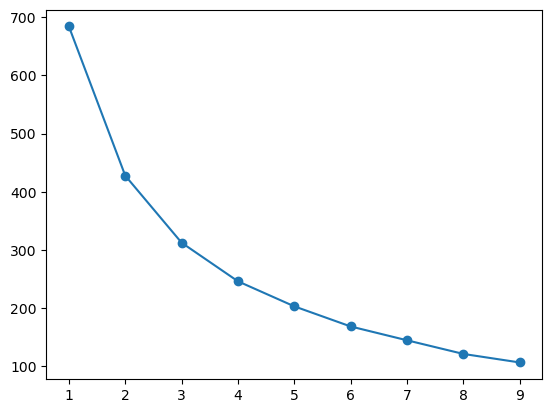

,0
2,0.363022
3,0.393804
4,0.355018
5,0.387875
6,0.391610
7,0.373941
8,0.386723
9,0.333824


In [19]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
I = [] # 오차제곱합 
sil_kmean = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(df_user_scaled)
    if k > 1:
        sil_kmean.append(silhouette_score(df_user_scaled, kmeans.labels_))
    I.append(kmeans.inertia_)

plt.plot(list(range(1, 10)), I, marker = 'o')
plt.show()

sil = pd.DataFrame(sil_kmean, index = list(range(2,10)))
sil

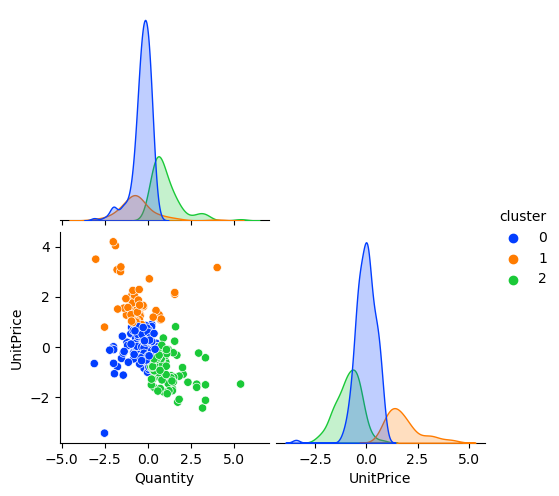

In [20]:
# Elbow 방법과 실루엣 계수 모두 3개 군집이 적당하다고 판단된다.
kmeans = KMeans(n_clusters=3).fit(df_user_scaled)
df_user_scaled_k = df_user_scaled.copy()
df_user_scaled_k['cluster'] = kmeans.labels_

# 군집
import seaborn as sns
sns.pairplot(df_user_scaled_k,
             diag_kind = 'kde',
             hue = 'cluster',
             palette = 'bright',
             corner = True)

plt.show()

In [46]:
df_user_scaled_db = df_user_scaled.copy()
epss = [0.05, 0.1, 0.15, 0.2, 0.25]

sil = []
for eps in epss:
    dbscan = DBSCAN(eps = eps, min_samples=5).fit(df_user_scaled_db.iloc[:, :-1])
    sil.append(silhouette_score(df_user_scaled, dbscan.labels_))
    
sil

# eps = 1 일 때 가장 실루엣 계수가 높음

[0.08788200370772932,
 0.2447154663532089,
 0.46534037590628063,
 0.5991172623978046,
 0.5574106618409366]

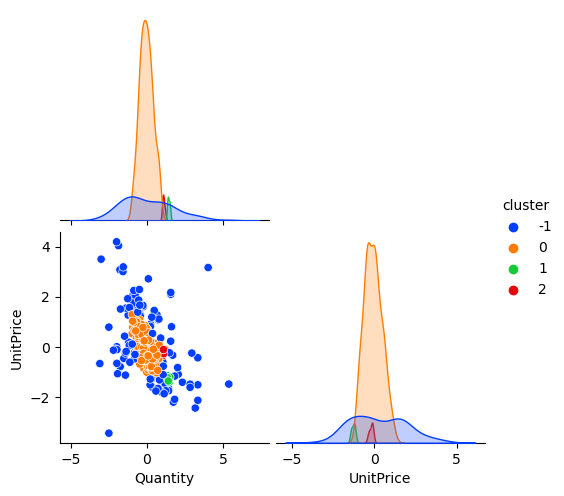

In [45]:
# DBSCAN 
dbscan = DBSCAN(eps = 0.2, min_samples=5).fit(df_user_scaled_db.iloc[:, :-1])
df_user_scaled_db['cluster'] = dbscan.labels_

# DBSCAN 시각화
sns.pairplot(df_user_scaled_db,
             diag_kind = 'kde',
             hue = 'cluster',
             palette = 'bright',
             corner = True)

plt.show()

## 2번
### 2-1. 
위에서 생성한 군집들의 특성을 분석할 것

In [48]:
df_user

,Quantity,UnitPrice
CustomerID,,
12348.0,23.333333,0.650000
12349.0,9.017241,2.607759
12350.0,12.250000,1.581250
12352.0,5.986301,3.054110
12354.0,11.522727,2.403864
...,...,...
14934.0,10.115942,2.388261
14936.0,12.516245,2.170794
14937.0,12.093750,3.000000


In [49]:
# KMeans 군집분석
df_user_k = df_user.copy()
df_user_k['cluster'] = kmeans.labels_
df_user_k.groupby('cluster').mean() 

,Quantity,UnitPrice
cluster,,
0,9.547763,2.209867
1,8.476197,3.386615
2,14.994567,1.664138


In [50]:
# dbscan 군집분석
df_user_db = df_user.copy()
df_user_db['cluster'] = dbscan.labels_
df_user_db.groupby('cluster').mean() 

,Quantity,UnitPrice
cluster,,
-1,13.592593,2.040503
0,23.555556,1.354222
1,10.607530,2.248618


### 2-2. 
각 군집 별 대표 추천 상품을 도출할 것

### 2-3. 
CustomerID가 12413인 고객을 대상으로 상품을 추천할 것

## 3번
철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90%, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

In [81]:
from scipy.stats import norm
p = 0.9 # 모비율
ME = 0.05
conf_a = 0.1
conf_z = norm.ppf(1-conf_a/2)
ssize = conf_z **2 * p * (1-p) / ME**2
ssize

97.39956434743482

## 4번
다음은 1월부터 9월까지의 은의 가격이다

In [86]:
month = pd.DataFrame([12.14, 42.6, 34.4, 35.29, 30.96, 57.12, 37.84, 42.49, 31.38], index=['1월','2월','3월','4월','5월','6월','7월','8월','9월'], columns = ['USD/oz'])
month

,USD/oz
1월,12.14
2월,42.60
3월,34.40
4월,35.29
5월,30.96
6월,57.12
7월,37.84
8월,42.49
9월,31.38


### 4-1 
은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

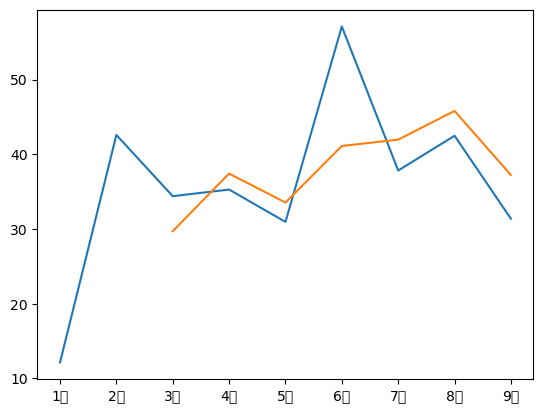

In [95]:
rw3 = month.rolling(window=3).mean().dropna()
plt.plot(month.index , month['USD/oz'])
plt.plot(rw3.index, rw3['USD/oz'])

### 4-2 
1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

In [102]:
month

,USD/oz
1월,12.14
2월,42.60
3월,34.40
4월,35.29
5월,30.96
6월,57.12
7월,37.84
8월,42.49
9월,31.38


In [108]:
jan = month.values[0]
sep = month.values[-1]

print(((sep - jan)/jan) * 100)

[158.48434926]


## 5번 
A,B,C 자치구별 W 의원에 대한 찬성, 반대 지지를 나타낸다. 자치구별 지지율이 같은지에 대해서 검정하라

In [124]:
df = pd.DataFrame({'A' : [176, 124], 'B' : [193, 107], 'C' : [159, 141]}, index = ['찬성', '반대'])
df

,A,B,C
찬성,176,193,159
반대,124,107,141


## 5-1 
연구가설과 귀무가설을 설정하라

In [125]:
# 동질성 검정
# H0 : 자치구별 지지율이 같다.
# H1 : 자치구별 지지율이 다르다.

## 5-2 
검정통계량 구하고 결론을 내라

In [126]:
from scipy.stats import chi2_contingency

statistic, pvalue , df, expect = chi2_contingency(df)
print(statistic, pvalue)

# 귀무가설을 기각한다. 즉 지지율이 다르다.

7.945381231671554 0.01882272023214683


## 6번 
A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 problem6.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.

In [133]:
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem6.csv')
data.head()

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0
5,male,83.9
6,male,91.2
7,male,103.2
8,male,83.0
9,male,101.2


### 6-1. 
연구가설과 귀무가설 설정하라

In [130]:
# H0 : 남녀 혈압의 평균은 같다.
# H1 : 남녀 혈압의 평균은 다르다.

### 6-2. 
통계량을 구하고, 연구가설 채택여부를 기술하라.

In [132]:
# 독립표본 T 검정
from scipy.stats import ttest_ind

male = data[data['gender'] == 'male']
female = data[data['gender'] == 'female']

ttest_ind(male['pressure'], female['pressure'], equal_var=True)

#r 귀무가설을 기각할 수 없다. 즉 남녀 혈압의 평균은 같다.

Ttest_indResult(statistic=1.3813481801194591, pvalue=0.18044550626193734)

### 6-3. 
6-2에서 구한 검정 통계량 값을 바탕으로 신뢰구간을 구하라

In [155]:
from scipy.stats import t
import numpy as np
mean_m = male['pressure'].mean()
mean_f = female['pressure'].mean()

std_m = male['pressure'].std(ddof=1)
std_f = female['pressure'].std(ddof=1)

n1, n2 = 16, 9
d = mean_m - mean_f
conf_a = 0.05 # 신뢰수준

Sp = np.sqrt((std_m**2)/n1 + std_f**2/n2)

tstats = t.ppf(1-conf_a/2, 23)
ME = tstats * Sp

d + ME, d - ME

(13.415481352086799, -2.822425796531233)

## 7번 
height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라.
- A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.      
- 이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다

In [156]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem7.csv')
data

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499
...,...,...,...
406,174.207,73.736,80.1779
407,174.702,74.529,80.1306
408,176.858,76.083,80.4527
409,175.566,76.459,80.2019


### 7-1 
아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
- 베이지안 회귀
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. 이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.

In [160]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split

X = data.drop(['weight'], axis = 1)
y = data['weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bayes = BayesianRidge(n_iter = 1000, fit_intercept= False, lambda_1=0.005, lambda_2=0.005)
bayes.fit(X_train, y_train)

bayes.coef_

array([ 1.09250024, -1.45389915])

### 7-2 
7-1에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라

In [162]:
bayes.predict([[180, 85]])

array([73.06861625])